In [3]:
import pandas as pd
import graphviz
from sklearn.tree import export_graphviz

In [4]:
square_final = pd.read_csv('final.csv', encoding = 'cp949')

In [5]:
square_final['square_code'] = square_final['square_code'].astype(str)

In [6]:
nine_area = square_final.loc[square_final['all'] == 9]

In [34]:
nine_area

,PID,M_ID,nature,traffic,food,info,facility,kind,total,loc_code,money,age,age_group,money_group,label_group,a_c,square_code,all
531,1131303,114502,3,4,4,4,4,4,4,931010,50000,81,6,2,17,경기 수원시,93101017,9
532,1160101,102563,5,4,4,4,4,3,5,931010,80000,84,6,2,17,경기 수원시,93101017,9
533,1160101,900100,5,4,4,4,4,3,5,931010,80000,84,6,2,17,경기 수원시,93101017,9
619,1056601,109353,5,5,4,5,5,4,5,911050,25000,46,4,1,10,서울 광진구,91105010,9
620,1056602,109353,5,5,4,5,5,4,5,911050,25000,46,4,1,10,서울 광진구,91105010,9
621,1503102,110373,5,5,4,5,5,5,4,911050,22700,52,4,1,10,서울 광진구,91105010,9
749,1043001,303285,4,3,5,3,4,4,5,911240,250000,69,5,3,15,서울 송파구,91124015,9
750,1043002,303285,4,3,5,3,4,4,5,911240,250000,62,5,3,15,서울 송파구,91124015,9
751,1048002,123294,3,5,3,5,5,5,5,911240,150000,71,5,3,15,서울 송파구,91124015,9
752,1182901,114767,5,4,5,5,5,5,5,911240,112500,79,5,3,15,서울 송파구,91124015,9


In [7]:
dataset_data = nine_area[['nature', 'traffic', 'food', 'info', 'facility', 'kind', 'age_group', 'money_group']]
dataset_target = nine_area['square_code']

In [45]:
x = list(dataset_target)
x = list(set(x))
len(x)

203

In [46]:
feature_names =['nature', 'traffic', 'food', 'info', 'facility', 'kind', 'age_group', 'money_group']
target_names = x

In [9]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.2)

In [37]:
X_train.head()

,nature,traffic,food,info,facility,kind,age_group,money_group
4874,4,4,4,4,4,4,4,1
3177,5,5,4,5,5,5,1,3
7056,4,5,4,5,5,4,3,1
1482,4,4,4,3,3,3,2,3
7166,4,4,4,4,4,4,5,3


In [15]:
dt =  DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.42201834862385323

#### 시각화

In [20]:
import graphviz
from sklearn.tree import export_graphviz

In [30]:
feature_names

['nature',
 'traffic',
 'food',
 'info',
 'facility',
 'kind',
 'age_group',
 'money_group']

In [31]:
target_names

['square_code']

In [59]:
dot_data = export_graphviz(dt,out_file = None, feature_names=feature_names, class_names=target_names)

In [60]:
graph = graphviz.Source(dot_data)

In [63]:
from graphviz import Graph
graph.render('dt-grap',view = True)

'dt-grap.pdf'

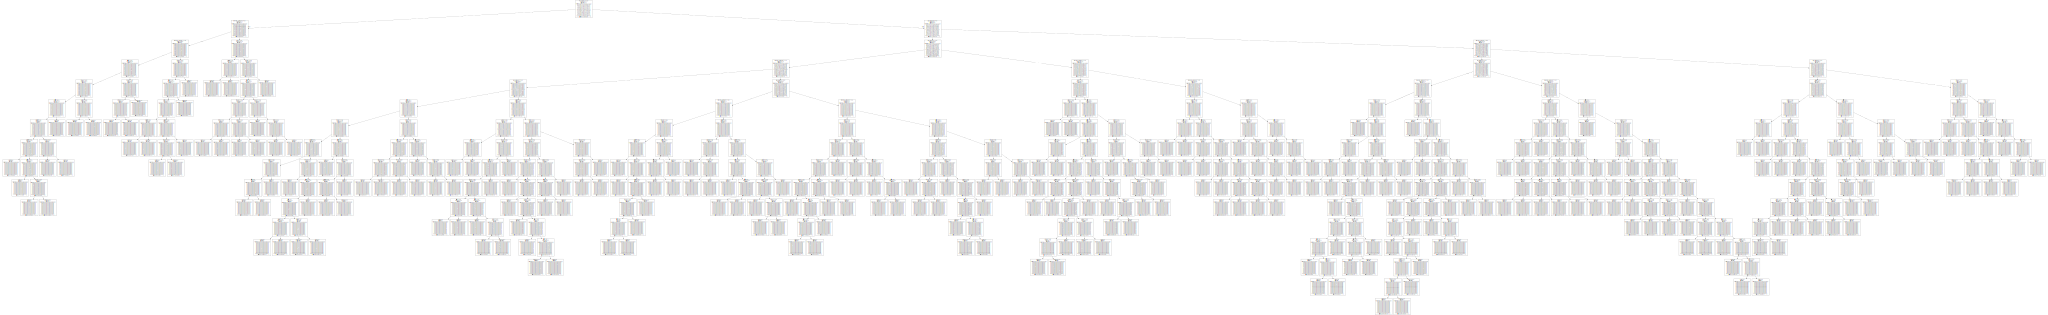

In [49]:
graph